# About

These is a base solution of PID.

In [1]:
%matplotlib inline
import random
import pandas
import numpy
import cPickle as pickle
import matplotlib.pyplot as plt

import root_numpy
from sklearn.metrics import roc_auc_score, roc_curve

from rep.estimators import TMVAClassifier

# Directories

In [3]:
track = 'Long'

data_path = "/notebooks/data/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/\
GhostAccFrac1.0/TMVA-Run2-NoTkLikCD/" + track

particle = 'Electron'
work_path_electron = "/notebooks/mikhail91/PID/mikhail_hushchyn/baseline/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/GhostAccFrac1.0/" + \
particle + "/" + track + "/TMVA/kMLP"
netconfig_path_electron = "/notebooks/data/configs/networks/TMVA-Run2-NoTkLikCDVelodEdx/" + "GlobalPID_" \
+ particle + "_" + track + "_ANN.txt"

particle = 'Proton'
work_path_proton = "/notebooks/mikhail91/PID/mikhail_hushchyn/baseline/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/GhostAccFrac1.0/" + \
particle + "/" + track + "/TMVA/kMLP"
netconfig_path_proton = "/notebooks/data/configs/networks/TMVA-Run2-NoTkLikCDVelodEdx/" + "GlobalPID_" \
+ particle + "_" + track + "_ANN.txt"

particle = 'Pion'
work_path_pion = "/notebooks/mikhail91/PID/mikhail_hushchyn/baseline/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/GhostAccFrac1.0/" + \
particle + "/" + track + "/TMVA/kMLP"
netconfig_path_pion = "/notebooks/data/configs/networks/TMVA-Run2-NoTkLikCDVelodEdx/" + "GlobalPID_" \
+ particle + "_" + track + "_ANN.txt"

particle = 'Muon'
work_path_muon = "/notebooks/mikhail91/PID/mikhail_hushchyn/baseline/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/GhostAccFrac1.0/" + \
particle + "/" + track + "/TMVA/kMLP"
netconfig_path_muon = "/notebooks/data/configs/networks/TMVA-Run2-NoTkLikCDVelodEdx/" + "GlobalPID_" \
+ particle + "_" + track + "_ANN.txt"

particle = 'Kaon'
work_path_kaon = "/notebooks/mikhail91/PID/mikhail_hushchyn/baseline/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/GhostAccFrac1.0/" + \
particle + "/" + track + "/TMVA/kMLP"
netconfig_path_kaon = "/notebooks/data/configs/networks/TMVA-Run2-NoTkLikCDVelodEdx/" + "GlobalPID_" \
+ particle + "_" + track + "_ANN.txt"

particle = 'Ghost'
work_path_ghost = "/notebooks/mikhail91/PID/mikhail_hushchyn/baseline/MC2015Sim09Dev03/TrainMixture/TrainPhysTks-EvalPhysTks-NoReweight/GhostAccFrac1.0/" + \
particle + "/" + track + "/TMVA/kMLP"
netconfig_path_ghost = "/notebooks/data/configs/networks/TMVA-Run2-NoTkLikCDVelodEdx/" + "GlobalPID_" \
+ particle + "_" + track + "_ANN.txt"

# Classifiers

In [4]:
# Read classifier
clf_pickle2 = open(work_path_electron + '/classifier.pkl', 'rb')
tmva_mlp_electron = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open(work_path_proton + '/classifier.pkl', 'rb')
tmva_mlp_proton = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open(work_path_pion + '/classifier.pkl', 'rb')
tmva_mlp_pion = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open(work_path_muon + '/classifier.pkl', 'rb')
tmva_mlp_muon = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open(work_path_kaon + '/classifier.pkl', 'rb')
tmva_mlp_kaon = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open(work_path_ghost + '/classifier.pkl', 'rb')
tmva_mlp_ghost = pickle.load(clf_pickle2)
clf_pickle2.close()

# Read eval data

In [5]:
filename = data_path + "/data_eval.csv"

n = sum(1 for line in open(filename)) - 1
s = n//10
skip = sorted(random.sample(xrange(1,n+1),n-s))

data_eval = pandas.read_csv(filename, skiprows=skip)

# Labels

In [6]:
particle_pdg_codes = {"all": 999999,
                    "Ghost": 0,
                    "Electron": 11,
                    "Muon": 13,
                    "Pion": 211,
                    "Kaon": 321,
                    "Proton": 2212}


pdg = particle_pdg_codes['Electron']
labels_electron = (numpy.abs(data_eval.MCParticleType.values) == pdg) * 1.

pdg = particle_pdg_codes['Proton']
labels_proton = (numpy.abs(data_eval.MCParticleType.values) == pdg) * 1.

pdg = particle_pdg_codes['Pion']
labels_pion = (numpy.abs(data_eval.MCParticleType.values) == pdg) * 1.

pdg = particle_pdg_codes['Muon']
labels_muon = (numpy.abs(data_eval.MCParticleType.values) == pdg) * 1.

pdg = particle_pdg_codes['Kaon']
labels_kaon = (numpy.abs(data_eval.MCParticleType.values) == pdg) * 1.

pdg = particle_pdg_codes['Ghost']
labels_ghost = (numpy.abs(data_eval.MCParticleType.values) == pdg) * 1.

# Probabilities

In [7]:
proba_electron = tmva_mlp_electron.predict_proba(data_eval)

proba_proton = tmva_mlp_proton.predict_proba(data_eval)

proba_pion = tmva_mlp_pion.predict_proba(data_eval)

proba_muon = tmva_mlp_muon.predict_proba(data_eval)

proba_kaon = tmva_mlp_kaon.predict_proba(data_eval)

proba_ghost = tmva_mlp_ghost.predict_proba(data_eval)

In [11]:
probas_all = (proba_electron[:, [1]], 
              proba_proton[:, [1]], 
              proba_pion[:, [1]], 
              proba_muon[:, [1]], 
              proba_kaon[:, [1]], 
              proba_ghost[:, [1]])

proba_overall = numpy.concatenate(probas_all, axis=1)
proba_overall = proba_overall/proba_overall.sum(axis=1, keepdims=True)

# Roc aucs

In [13]:
roc_auc_electron = roc_auc_score(labels_electron, proba_electron[:, 1])
fpr_electron, tpr_electron, _ = roc_curve(labels_electron, proba_electron[:, 1])

roc_auc_proton = roc_auc_score(labels_proton, proba_proton[:, 1])
fpr_proton, tpr_proton, _ = roc_curve(labels_proton, proba_proton[:, 1])

roc_auc_pion = roc_auc_score(labels_pion, proba_pion[:, 1])
fpr_pion, tpr_pion, _ = roc_curve(labels_pion, proba_pion[:, 1])

roc_auc_muon = roc_auc_score(labels_muon, proba_muon[:, 1])
fpr_muon, tpr_muon, _ = roc_curve(labels_muon, proba_muon[:, 1])

roc_auc_kaon = roc_auc_score(labels_kaon, proba_kaon[:, 1])
fpr_kaon, tpr_kaon, _ = roc_curve(labels_kaon, proba_kaon[:, 1])

roc_auc_ghost = roc_auc_score(labels_ghost, proba_ghost[:, 1])
fpr_ghost, tpr_ghost, _ = roc_curve(labels_ghost, proba_ghost[:, 1])

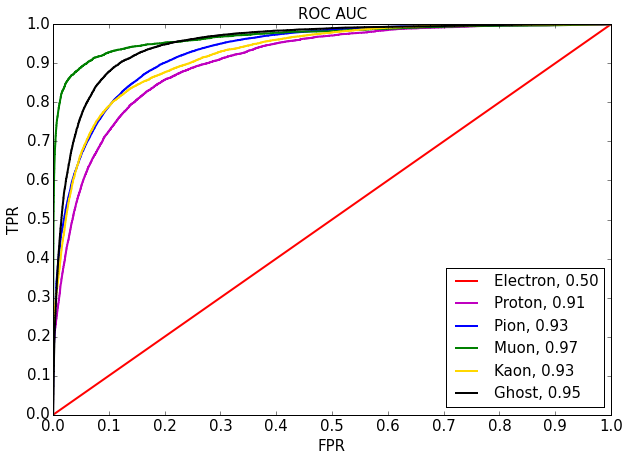

In [28]:
particles = ["Ghost", "Electron", "Muon", "Pion", "Kaon", "Proton"]
colors = ['k', 'r', 'g', 'b', 'gold', 'm']

plt.figure(figsize=(10,7))
plt.plot(fpr_electron, tpr_electron, label='Electron, %.2f' % roc_auc_electron, color='r', linewidth=2)
plt.plot(fpr_proton, tpr_proton, label='Proton, %.2f' % roc_auc_proton, color='m', linewidth=2)
plt.plot(fpr_pion, tpr_pion, label='Pion, %.2f' % roc_auc_pion, color='b', linewidth=2)
plt.plot(fpr_muon, tpr_muon, label='Muon, %.2f' % roc_auc_muon, color='g', linewidth=2)
plt.plot(fpr_kaon, tpr_kaon, label='Kaon, %.2f' % roc_auc_kaon, color='gold', linewidth=2)
plt.plot(fpr_ghost, tpr_ghost, label='Ghost, %.2f' % roc_auc_ghost, color='k', linewidth=2)
plt.title("ROC AUC", size=15)
plt.xlabel("FPR", size=15)
plt.ylabel("TPR", size=15)
plt.legend(loc='best',prop={'size':15})
plt.xticks(numpy.arange(0, 1.01, 0.1), size=15)
plt.yticks(numpy.arange(0, 1.01, 0.1), size=15)


plt.savefig(work_path_electron + "/overall_roc_auc.png")
plt.savefig(work_path_proton + "/overall_roc_auc.png")
plt.savefig(work_path_pion + "/overall_roc_auc.png")
plt.savefig(work_path_muon + "/overall_roc_auc.png")
plt.savefig(work_path_kaon + "/overall_roc_auc.png")
plt.savefig(work_path_ghost + "/overall_roc_auc.png")

plt.show()

# Roc matrix

In [66]:
roc_auc_electron = roc_auc_score(labels_electron, proba_electron[:, 1])

probas_list = [proba_electron, proba_proton, proba_pion, proba_muon, proba_kaon, proba_ghost]
labels_list = [labels_electron, labels_proton, labels_pion, labels_muon, labels_kaon, labels_ghost]

roc_matrics = numpy.ones((6,6))

for i in range(0, 6):
    for j in range(0, 6):
        if i==j:
            continue
        sel = ((labels_list[i] != 0) + (labels_list[j] != 0)) * 1.
        roc_auc = roc_auc_score(labels_list[i], proba_overall[:, i]/proba_overall[:, j], sample_weight=sel)
        roc_matrics[i,j] = roc_auc

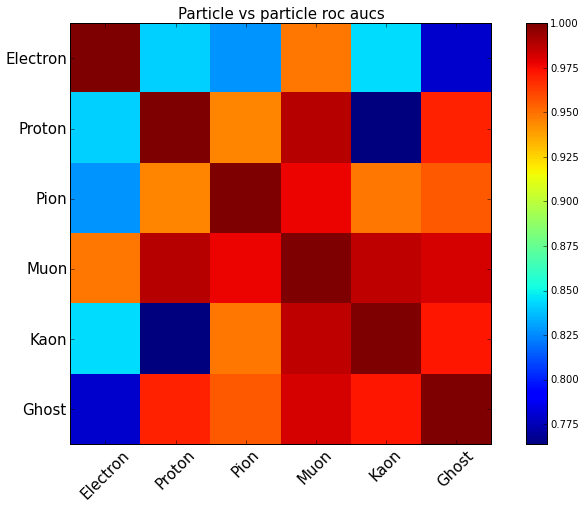

In [70]:
particles = ['Electron', 'Proton', 'Pion', 'Muon', 'Kaon', 'Ghost']

plt.figure(figsize=(10,7))
plt.imshow(roc_matrics, interpolation='nearest')
tick_marks = numpy.arange(len(particles))
plt.xticks(tick_marks, particles, rotation=45, size=15)
plt.yticks(tick_marks, particles, size=15)
plt.colorbar()
plt.tight_layout()
plt.title('Particle vs particle roc aucs', size=15)


plt.savefig(work_path_electron + "/class_vs_class_roc_auc_matrix.png")
plt.savefig(work_path_proton + "/class_vs_class_roc_auc_matrix.png")
plt.savefig(work_path_pion + "/class_vs_class_roc_auc_matrix.png")
plt.savefig(work_path_muon + "/class_vs_class_roc_auc_matrix.png")
plt.savefig(work_path_kaon + "/class_vs_class_roc_auc_matrix.png")
plt.savefig(work_path_ghost + "/class_vs_class_roc_auc_matrix.png")
plt.show()